<center>
    <h1 style="color: #3498db;">Árboles para la  Serie de Tiempo sobre el rendimiento del Atleta Iván</h1>
</center>


En muchas ocasiones los árboles no son buenos manejando las tendencia, por eso se sugiere
quitar la tendencia y analizar la serie sin tendencia.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn
import os

Datos sobre kilómetros recorridos por el Atleta Iván en su entrenamiento desde el 31 de diciembre de 2018 hasta 12 de febrero de 2024.

In [2]:
ruta = r"C:\Users\Lenovo\Desktop\Escritorio\Serie_Ivan.xlsx"

# Lee el archivo Excel
ivan = pd.read_excel(ruta,index_col=0)

# Muestra las primeras filas del DataFrame
print(ivan.head())
ivan.size

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5


268

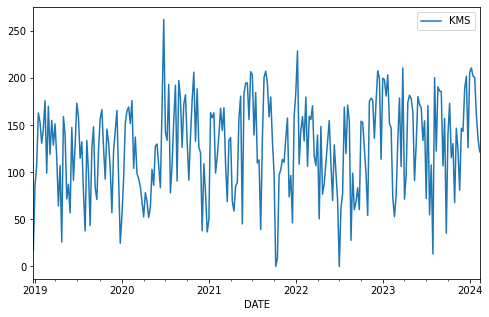

In [3]:
ivan.plot(figsize=(8,5))
pyplot.show()

In [4]:
print(ivan)

              KMS
DATE             
2018-12-31   17.3
2019-01-07   86.4
2019-01-14  107.3
2019-01-21  163.1
2019-01-28  153.5
...           ...
2024-01-15  202.2
2024-01-22  200.9
2024-01-29  160.7
2024-02-05  135.7
2024-02-12  121.8

[268 rows x 1 columns]


**Autocorrelación simple**

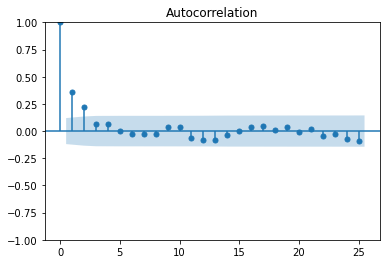

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ivan)
plt.show()

**Autocorrelación parcial**

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


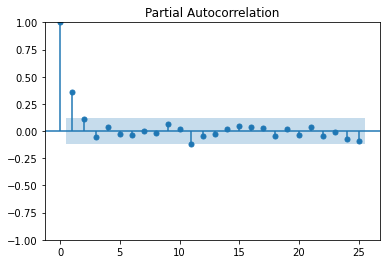

In [6]:
plot_pacf(ivan)
plt.show()

<h2 style="color: #e67e22; text-align: left;">Creación de variables rezagadas</h2>

In [7]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


*Poner explicación:*

In [8]:
# Número de semanas a considerar para los retrasos de tiempo
semanas_totales = 2

for i in range(2, 0, -1):
    df1['t-'+str(i)] = ivan.shift(i)

# Imprimir el DataFrame resultante
print(df1)


              t-2    t-1
DATE                    
2018-12-31    NaN    NaN
2019-01-07    NaN   17.3
2019-01-14   17.3   86.4
2019-01-21   86.4  107.3
2019-01-28  107.3  163.1
...           ...    ...
2024-01-15  206.3  211.0
2024-01-22  211.0  202.2
2024-01-29  202.2  200.9
2024-02-05  200.9  160.7
2024-02-12  160.7  135.7

[268 rows x 2 columns]


In [9]:
# Create column t
df1['t'] = ivan.values
print(df1.head(10))

              t-2    t-1      t
DATE                           
2018-12-31    NaN    NaN   17.3
2019-01-07    NaN   17.3   86.4
2019-01-14   17.3   86.4  107.3
2019-01-21   86.4  107.3  163.1
2019-01-28  107.3  163.1  153.5
2019-02-04  163.1  153.5  131.0
2019-02-11  153.5  131.0  146.1
2019-02-18  131.0  146.1  176.2
2019-02-25  146.1  176.2   99.2
2019-03-04  176.2   99.2  170.2


In [10]:
# Nuevo df, eliminando los Nans
df1_ivan = df1[2:]
print(df1_ivan)
df1_ivan.size

              t-2    t-1      t
DATE                           
2019-01-14   17.3   86.4  107.3
2019-01-21   86.4  107.3  163.1
2019-01-28  107.3  163.1  153.5
2019-02-04  163.1  153.5  131.0
2019-02-11  153.5  131.0  146.1
...           ...    ...    ...
2024-01-15  206.3  211.0  202.2
2024-01-22  211.0  202.2  200.9
2024-01-29  202.2  200.9  160.7
2024-02-05  200.9  160.7  135.7
2024-02-12  160.7  135.7  121.8

[266 rows x 3 columns]


798

skforecast  es una librería de python que permite "
Time series forecasting with scikit-learn regressors", la cual permiten desde la partición de los datos, y la cración del aprendizaje supervisado.Funciona bien con las funciones de sklearn. Ver https://joaquinamatrodrigo.github.io/skforecast/0.5.0/index.html.

In [11]:
df1_ivan.values

array([[1.730e+01, 8.640e+01, 1.073e+02],
       [8.640e+01, 1.073e+02, 1.631e+02],
       [1.073e+02, 1.631e+02, 1.535e+02],
       [1.631e+02, 1.535e+02, 1.310e+02],
       [1.535e+02, 1.310e+02, 1.461e+02],
       [1.310e+02, 1.461e+02, 1.762e+02],
       [1.461e+02, 1.762e+02, 9.920e+01],
       [1.762e+02, 9.920e+01, 1.702e+02],
       [9.920e+01, 1.702e+02, 1.191e+02],
       [1.702e+02, 1.191e+02, 1.553e+02],
       [1.191e+02, 1.553e+02, 1.288e+02],
       [1.553e+02, 1.288e+02, 1.515e+02],
       [1.288e+02, 1.515e+02, 1.161e+02],
       [1.515e+02, 1.161e+02, 6.440e+01],
       [1.161e+02, 6.440e+01, 1.072e+02],
       [6.440e+01, 1.072e+02, 2.600e+01],
       [1.072e+02, 2.600e+01, 1.594e+02],
       [2.600e+01, 1.594e+02, 1.398e+02],
       [1.594e+02, 1.398e+02, 7.170e+01],
       [1.398e+02, 7.170e+01, 8.730e+01],
       [7.170e+01, 8.730e+01, 5.690e+01],
       [8.730e+01, 5.690e+01, 1.477e+02],
       [5.690e+01, 1.477e+02, 9.160e+01],
       [1.477e+02, 9.160e+01, 1.28

<h2 style="color: #e67e22; text-align: left;">Dividir los datos</h2>

In [12]:
# Split data

ivansplit = df1_ivan.values
# split into lagged variables and original time series
X1= ivansplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =ivansplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [13]:
print(X1)
print(y1)

[[1.730e+01 8.640e+01]
 [8.640e+01 1.073e+02]
 [1.073e+02 1.631e+02]
 [1.631e+02 1.535e+02]
 [1.535e+02 1.310e+02]
 [1.310e+02 1.461e+02]
 [1.461e+02 1.762e+02]
 [1.762e+02 9.920e+01]
 [9.920e+01 1.702e+02]
 [1.702e+02 1.191e+02]
 [1.191e+02 1.553e+02]
 [1.553e+02 1.288e+02]
 [1.288e+02 1.515e+02]
 [1.515e+02 1.161e+02]
 [1.161e+02 6.440e+01]
 [6.440e+01 1.072e+02]
 [1.072e+02 2.600e+01]
 [2.600e+01 1.594e+02]
 [1.594e+02 1.398e+02]
 [1.398e+02 7.170e+01]
 [7.170e+01 8.730e+01]
 [8.730e+01 5.690e+01]
 [5.690e+01 1.477e+02]
 [1.477e+02 9.160e+01]
 [9.160e+01 1.282e+02]
 [1.282e+02 1.735e+02]
 [1.735e+02 1.586e+02]
 [1.586e+02 1.150e+02]
 [1.150e+02 1.325e+02]
 [1.325e+02 7.870e+01]
 [7.870e+01 3.780e+01]
 [3.780e+01 1.339e+02]
 [1.339e+02 9.980e+01]
 [9.980e+01 4.350e+01]
 [4.350e+01 1.254e+02]
 [1.254e+02 1.484e+02]
 [1.484e+02 8.360e+01]
 [8.360e+01 7.120e+01]
 [7.120e+01 1.246e+02]
 [1.246e+02 1.573e+02]
 [1.573e+02 1.667e+02]
 [1.667e+02 1.261e+02]
 [1.261e+02 9.280e+01]
 [9.280e+01

**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)** variable respuesta:

In [14]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + (Validation) + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

# Se debe adicionar en este caso una observación a algún conjunto de datos, en este caso es para el conjunto de validación

Complete Observations for Target after Supervised configuration: 266
186 26 53
Train + (Validation) + Test: 265


Se le suma 1 al conjunto de validación:

In [15]:
# Target Train-Validation-Test split(70-10-20)
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 266
Training Observations for Target: 186
Validation Observations for Target: 27
Test Observations for Target: 53


**Conjunto de entrenamiento (70%), validación (10%) y prueba (20%)**  variables rezagadas:

In [55]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))


Observations for Feature: 265
Training Observations for Feature: 185
Validation Observations for Feature: 27
Test Observations for Feature: 53


<h2 style="color: #e67e22; text-align: left;">Selección de la profundidad óptima del árbol</h2>

Selecciona la profundidad máxima: Hasta que todas las hojas sean puras.

**La profundidad (o depth):** es una medida que indica el número máximo de niveles que hay desde la raíz hasta una hoja en el árbol. Es una forma de cuantificar la complejidad del árbol y su capacidad para capturar patrones en los datos.

In [63]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor
decision_tree_ivan = DecisionTreeRegressor()  # max-depth not set
decision_tree_ivan.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_ivan.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_ivan.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_ivan.predict(val_feature)-val_target)**2).mean()) )


Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -0.33556107471622876
el RECM sobre validación es: 3627.2048148148147


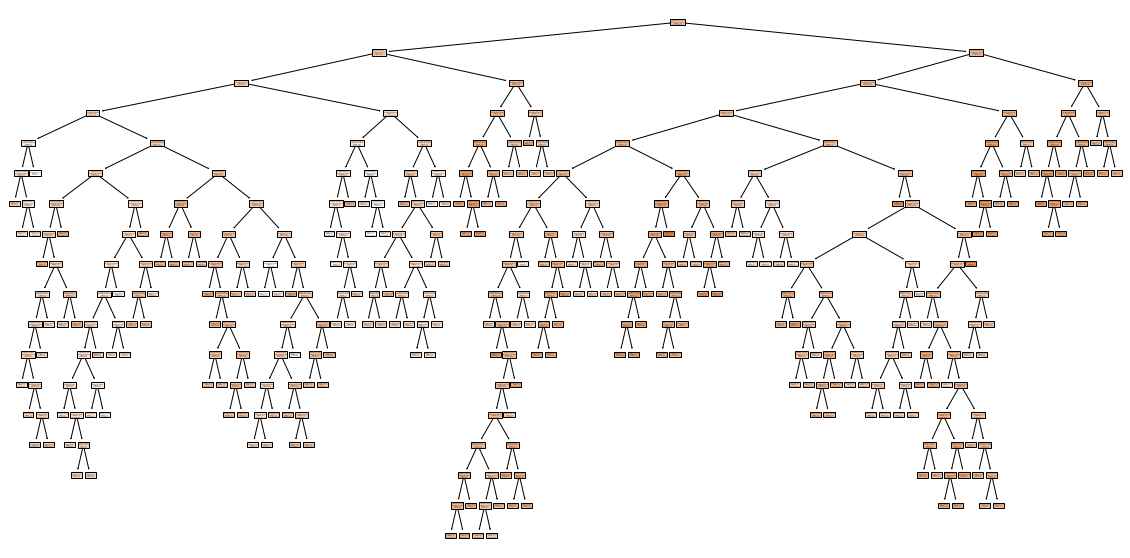

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(decision_tree_ivan, filled=True, feature_names=['Feature 1', 'Feature 2'])
plt.show()

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse(with respect to predict with sample mean)). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

En esta primera parte se puede observar un gran sobreajuste, debido al R2 sobre el conjunto de entrenamiento y el R2 sobre el conjunto de validacion. Es por eso que ahora se intenta buscar la mejor profundidad

In [72]:
# Find the best Max Depth
# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11]:
    # Create the tree and fit it
    decision_tree_ivan = DecisionTreeRegressor(max_depth=d)
    decision_tree_ivan.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_ivan.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_ivan.score(val_feature, val_target))  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_ivan.predict(val_feature),val_target, squared=False), '\n')



max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.24989976804833058
Coeficiente R2 sobre el conjunto de validación: 0.18875444455511803
el RECM sobre el conjunto de validación es: 46.93862121528077 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.2975560679808321
Coeficiente R2 sobre el conjunto de validación: 0.19437194143260983
el RECM sobre el conjunto de validación es: 46.775824880305755 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.37535366155764494
Coeficiente R2 sobre el conjunto de validación: 0.169702781490642
el RECM sobre el conjunto de validación es: 47.486586781328455 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.4840403700465118
Coeficiente R2 sobre el conjunto de validación: -0.10205146798710607
el RECM sobre el conjunto de validación es: 54.70853708995359 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.5724857736483537
Coeficiente R2 sobre el conjunto de validación: -0.240

Note que el RECM menor es con un depth de 3

<h2 style="color: #e67e22; text-align: left;">Usando la penalización</h2>

El método de poda basado en el costo de complejidad ayuda a encontrar el equilibrio entre la complejidad del modelo y su rendimiento. A medida que se aumenta **ccp_alpha**, el árbol se simplifica, lo que puede reducir el sobreajuste.

In [73]:
path=decision_tree_ivan.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 1.32432432e-03 2.70270270e-03 9.75675676e-03
 9.75675676e-03 1.55675676e-02 1.68918919e-02 3.90270270e-02
 4.11081081e-02 4.32432432e-02 4.54144144e-02 5.97027027e-02
 9.72972973e-02 1.00567568e-01 1.21324324e-01 1.21324324e-01
 1.43027027e-01 1.77324324e-01 2.09297297e-01 2.13657658e-01
 2.14081081e-01 2.33522523e-01 2.33756757e-01 3.39063063e-01
 4.08891892e-01 4.35918919e-01 4.64225225e-01 4.70918919e-01
 4.85297297e-01 4.92567568e-01 5.11872072e-01 5.70882883e-01
 6.22702703e-01 6.91891892e-01 9.22396396e-01 1.04650450e+00
 1.10099324e+00 1.17017297e+00 1.19189189e+00 1.30180180e+00
 1.30810811e+00 1.41275676e+00 1.53103153e+00 1.54410811e+00
 2.11891892e+00 2.11913514e+00 2.13287207e+00 2.32024324e+00
 2.35244144e+00 2.38014414e+00 2.60283108e+00 2.75503604e+00
 3.16118919e+00 3.25406306e+00 3.43623784e+00 3.45661158e+00
 3.48327027e+00 3.62803784e+00 3.64004487e+00 5.03024811e+00
 5.17625225e+00 5.25624324e+00 5.35801081e+00 5.41103604e+00
 6.27043288e+00 6.440990

In [80]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import sklearn
import pandas as pd

# Supongamos que ya tienes alphas definidos, así como train_feature, train_target, val_feature, val_target

# Listas para almacenar los resultados
RMSE_train = []
RMSE_test = []

# Evaluar el modelo para cada valor de alpha
for alpha in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir en los conjuntos de entrenamiento y validacion
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)
    
    # Calcular el RMSE y almacenar en las listas
    train_rmse = mean_squared_error(train_target, y_train_pred, squared=False)
    test_rmse = mean_squared_error(val_target, y_val_pred, squared=False)
    
    RMSE_train.append(train_rmse)
    RMSE_test.append(test_rmse)

# Convertir los resultados a un DataFrame para fácil visualización
results = pd.DataFrame({
    'Alpha': alphas,
    'Train RMSE': RMSE_train,
    'Test RMSE': RMSE_test
})

# Imprimir el DataFrame
print(results)

# Encontrar el alpha que minimiza el RMSE en los conjuntos de entrenamiento y prueba
optimal_alpha_train = alphas[np.argmin(RMSE_train)]
optimal_alpha_test = alphas[np.argmin(RMSE_test)]

print(f"El alpha óptimo para el conjunto de prueba es: {optimal_alpha_test:.3f}")


          Alpha  Train RMSE  Test RMSE
0      0.000000    0.000000  61.668796
1      0.001324    0.043184  60.748492
2      0.002703    0.067584  60.702120
3      0.009757    0.196180  61.261743
4      0.009757    0.196180  61.001114
..          ...         ...        ...
104   46.420190   39.830068  48.848721
105   48.068223   39.830068  48.848721
106   51.002219   40.428981  48.865956
107  130.456070   41.671416  47.143178
108  395.030813   43.208367  49.619011

[109 rows x 3 columns]
El alpha óptimo para el conjunto de prueba es: 40.966


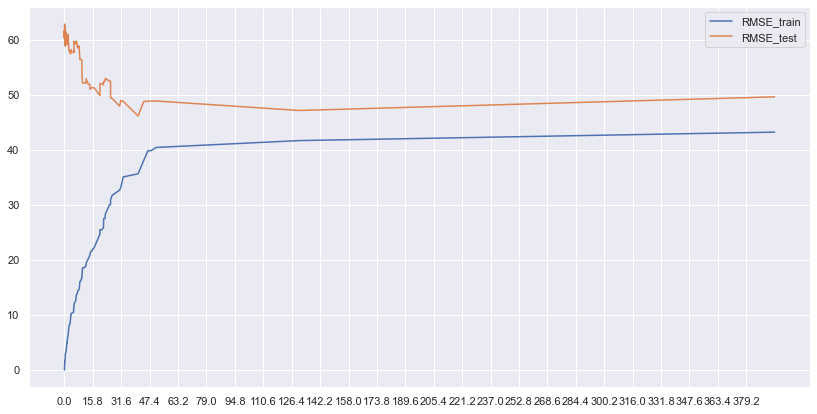

In [82]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=RMSE_train,x=alphas,label="RMSE_train")

sns.lineplot(y=RMSE_test,x=alphas,label="RMSE_test")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

En este gráfico, se espera ver que ambas líneas sigan una trayectoria similar, indicando que el ajuste del parámetro alpha afecta de manera similar tanto al rendimiento en entrenamiento como en prueba.

Note que le valor de $\alpha$ donde se minimiza el RMSE es  **40.966**. Vamos a tomar un valor de 40.966 para alpha y computaremos el árbol basado en ese valor de $\alpha$.

## <h2 style="color: #e67e22; text-align: left;">Juntar Entrenamiento y Validación</h2>

In [84]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(185, 2)
(27, 2)
(185,)
(27,)
(212, 2)
(212,)


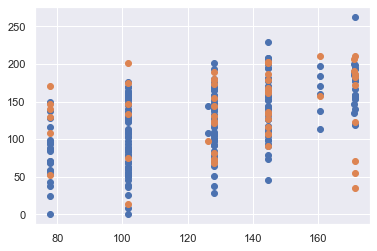

Raíz de la Pérdida cuadrática Entrenamiento: 40.32465284818278
Raíz de la Pérdida cuadrática Prueba: 52.20121791334682


In [85]:
# Plot predicted against actual values but with train + val

from matplotlib import pyplot as plt

# Use the best max_depth 

decision_tree_ivan = DecisionTreeRegressor(max_depth=3)  # fill in best max depth here
decision_tree_ivan.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction = decision_tree_ivan.predict(train_val_feature)
test_prediction = decision_tree_ivan.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))


**De acuerdo a la penalización óptima que es 40.966:**

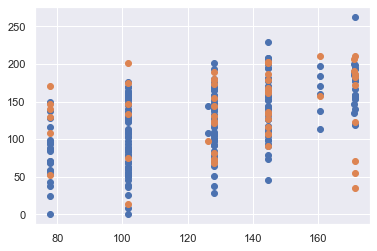

In [86]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_ivan_prun_mincost = DecisionTreeRegressor(ccp_alpha=40.966)  # fill in best max depth here
decision_tree_ivan_prun_mincost.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction_prun_mincost = decision_tree_ivan.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_ivan.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # orange
plt.show()

**De acuerdo a la profundidad óptima del árbol que es 3:**

In [88]:
from sklearn import tree

listacaract=list(df1_ivan.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_ivan)
print(text_representation)

|--- feature_1 <= 113.90
|   |--- feature_0 <= 172.45
|   |   |--- feature_0 <= 126.20
|   |   |   |--- value: [101.71]
|   |   |--- feature_0 >  126.20
|   |   |   |--- value: [77.90]
|   |--- feature_0 >  172.45
|   |   |--- feature_0 <= 193.05
|   |   |   |--- value: [160.38]
|   |   |--- feature_0 >  193.05
|   |   |   |--- value: [126.25]
|--- feature_1 >  113.90
|   |--- feature_1 <= 155.60
|   |   |--- feature_0 <= 194.40
|   |   |   |--- value: [128.12]
|   |   |--- feature_0 >  194.40
|   |   |   |--- value: [170.98]
|   |--- feature_1 >  155.60
|   |   |--- feature_0 <= 130.60
|   |   |   |--- value: [171.10]
|   |   |--- feature_0 >  130.60
|   |   |   |--- value: [144.71]



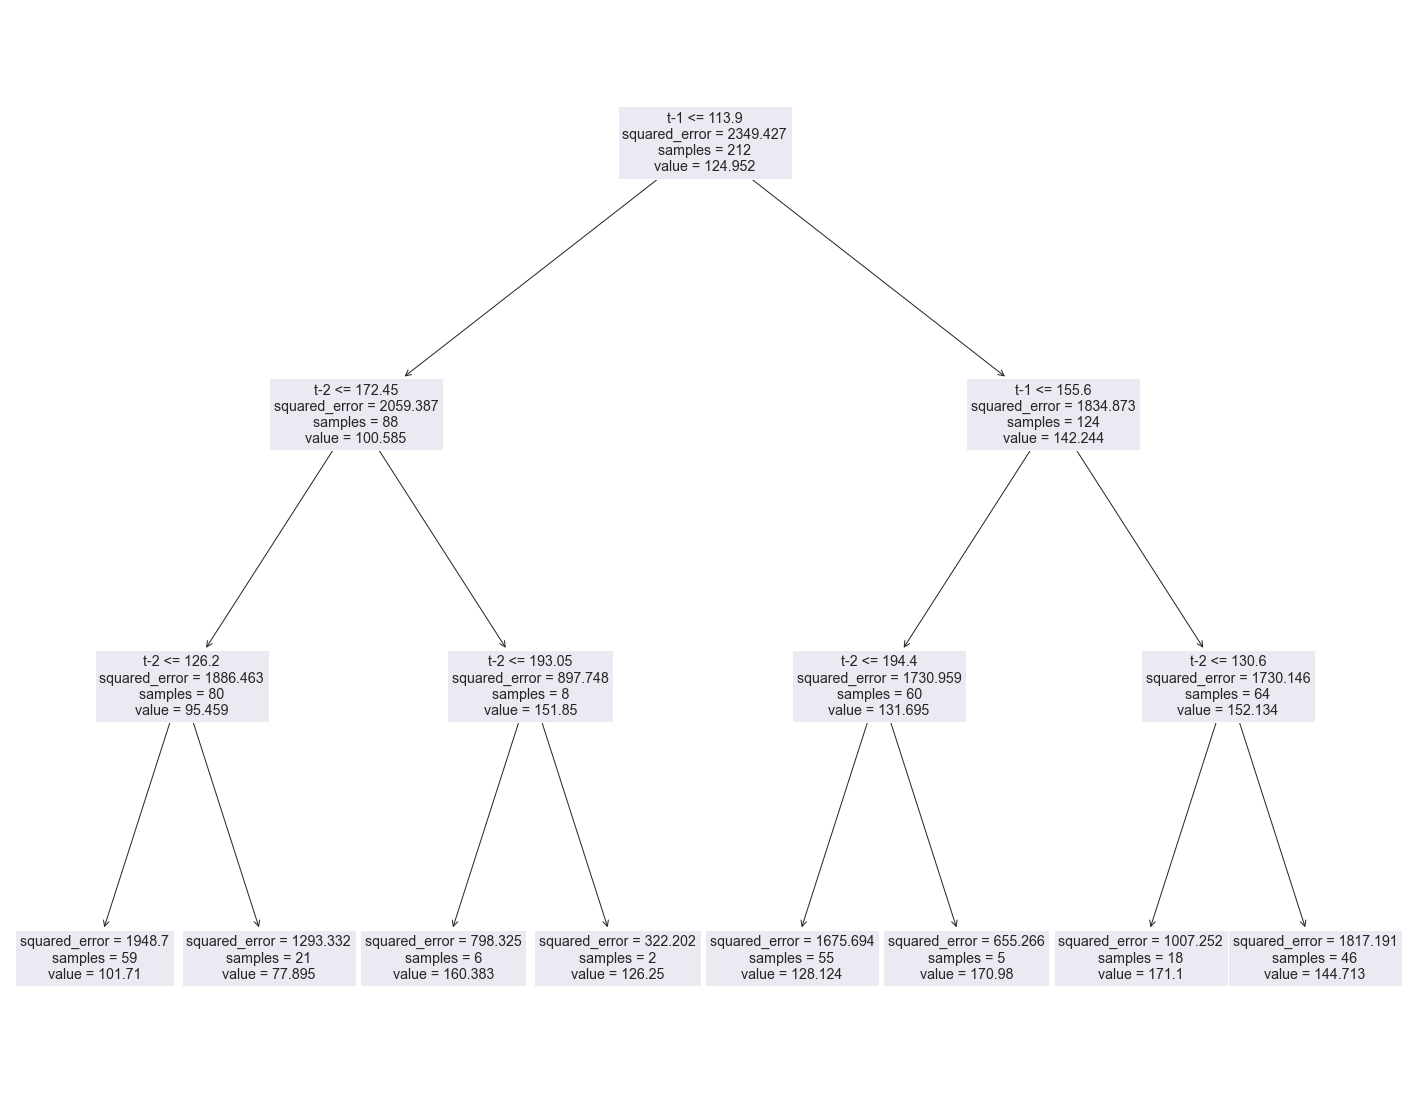

In [89]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_ivan, 
                   feature_names=listacaract)

Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronósticos.

In [90]:
print(train_val_prediction.size)
print(train_val_target.size)
print(test_prediction.size)
print(test_target.size)

212
212
53
53


In [91]:
indicetrian_val_test=df1_ivan.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:213]
indicetest=indicetrian_val_test[213:266]

265


In [92]:
print(indicetrain_val.size)
print(indicetest.size)

213
52


In [93]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

265
265


**Observados vs predichos modelos con profundidad 3**

In [94]:
d = {'Observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)

,Observado,Predicción
DATE,,
2019-01-21,163.1,101.710186
2019-01-28,153.5,171.100000
2019-02-04,131.0,128.123636
2019-02-11,146.1,128.123636
2019-02-18,176.2,128.123636
2019-02-25,99.2,144.713043
2019-03-04,170.2,160.383333
2019-03-11,119.1,171.100000
2019-03-18,155.3,128.123636


**Gráfico Observados vs Predichos**

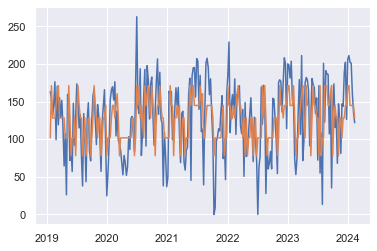

In [95]:
plt.plot(ObsvsPred)


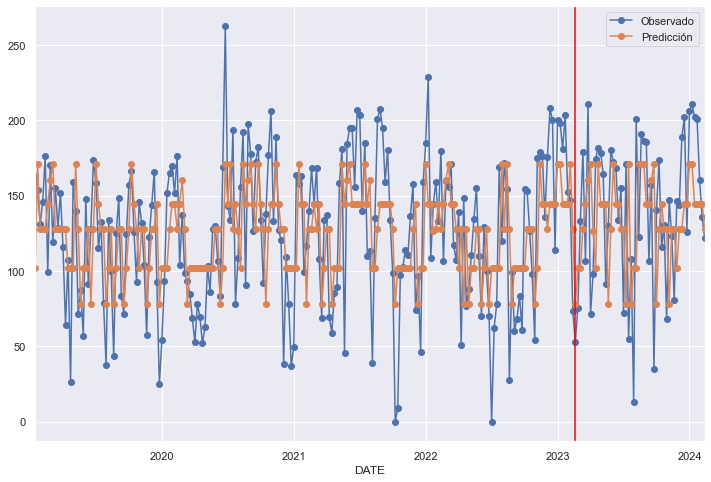

In [96]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[213].date(),color='red')

In [97]:
ObsvsPred

,Observado,Predicción
DATE,,
2019-01-21,163.1,101.710186
2019-01-28,153.5,171.100000
2019-02-04,131.0,128.123636
2019-02-11,146.1,128.123636
2019-02-18,176.2,128.123636
...,...,...
2024-01-15,202.2,144.713043
2024-01-22,200.9,144.713043
2024-01-29,160.7,144.713043


El **RMSE** sobre el conjunto de datos observados vs los predichos obtenido fue de: **52.20121791334682**.